### GIỚI THIỆU BÀI TOÁN VÀ TẬP DỮ LIỆU

Trong bài toán này, chúng ta đi đánh giá hiệu năng và khả năng dự đoán của một mô hình học máy đơn giản trên tập dữ liệu giá nhà được thu thập ở Bostom, Massachusetts.\
<br>
Tập dữ liệu được thu thập vào năm 1978 gồm 506 mẫu dữ liệu. Mỗi mẫu dữ liệu được tổng hợp từ 14 đặc trưng khác nhau. 

### NHẬP THƯ VIỆN

In [244]:
import random
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn import preprocessing

### ĐỌC DỮ LIỆU ĐẦU VÀO

nSử dụng thư viện pandas để đọc dữ liệu đầu vào\
Tập dữ liệu gồm 14 đặc trưng là:
```
- CRIM: Tỷ lệ tội phạm bình quân đầu người trong Thị Trấn.
- ZN: Tỷ lệ dân được phân vùng cho nhiều hơn 25.000 sq.ft.
- INDUS: Tỷ lệ diện tích kinh doanh khong bán lẻ trên mỗi Thị Trấn.
- CHAS: Gần sông Charles (1 nếu nằm ở bờ sông, 0 còn lại)
- NOX: Nồng độ oxit nitric (phần trên 10 triệu)
- RM: Số lượng phòng trung bình.
- AGE: Tỷ lệ xây trước năm 1940
- DIS: khoảng cách đến 5 trung tâm làm việc ở Boston
- RAD: Khả năng gần đường cao tốc
- TAX: Thuế tài sản trên $10,000
- PT: Tỷ lệ học sinh - giáo viên
- B: Tỷ lệ người da đen
- LSTAT: Tình trạng dân số
- MV: Giá trị trung bình của ngôi nhà, tính bằng $1000's
```

In [245]:
Boston_Housing_Dataset = pd.read_excel("E:/Tài liệu đại học/Tri tue nhan tao va ung dung/AI Project/dataset/Boston_Housing_Dataset.xls")
print(Boston_Housing_Dataset)

        CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.199997  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.900002  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.099998  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.799999  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.200001  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...        ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.099998  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.699997  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.000000  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.300003  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.800003  2.5050    1  273   

            PT           B  LSTAT         MV  
0    15.300000  

### KIỂM TRA DỮ LIỆU CÓ SẠCH HAY KHÔNG, CÓ KHUYẾT MẤT GIÁ TRỊ NÀO KHÔNG ?

In [246]:
Boston_Housing_Dataset.isnull().sum()/len(Boston_Housing_Dataset)*100

CRIM     0.0
ZN       0.0
INDUS    0.0
CHAS     0.0
NOX      0.0
RM       0.0
AGE      0.0
DIS      0.0
RAD      0.0
TAX      0.0
PT       0.0
B        0.0
LSTAT    0.0
MV       0.0
dtype: float64

### THỐNG KÊ XU HƯỚNG GIÁ NHÀ Ở BOSTON

In [247]:
prices = Boston_Housing_Dataset['MV']
# Minimum price of the data
minimum_price = np.min(prices)

# Maximum price of the data
maximum_price = np.max(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Thống kê về giá nhà của tập dữ liệu:")
print("Giá thấp nhất: ${:,.2f}".format(minimum_price))
print("Giá cao nhất: ${:,.2f}".format(maximum_price))
print("Giá trung bình: ${:,.2f}".format(mean_price))
print("Giá trung vị: ${:,.2f}".format(median_price))
print("Độ lệch chuẩn: ${:,.2f}".format(std_price))

Thống kê về giá nhà của tập dữ liệu:
Giá thấp nhất: $5.00
Giá cao nhất: $50.00
Giá trung bình: $22.53
Giá trung vị: $21.20
Độ lệch chuẩn: $9.19


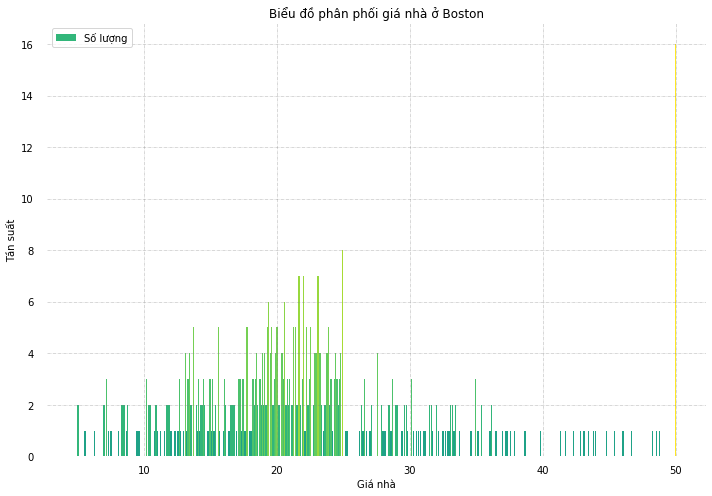

In [248]:
legend = ['Số lượng']
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)

# Remove x, y ticks
axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

# Add padding between axes and labels
axs.xaxis.set_tick_params(pad = 5)
axs.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)

# Creating histogram
N, bins, patches = axs.hist(prices, bins = len(prices))

# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# Adding extra features   
plt.xlabel("Giá nhà")
plt.ylabel("Tần suất")
plt.legend(legend)
plt.title('Biểu đồ phân phối giá nhà ở Boston')

# Show plot
plt.show()

Từ biểu đồ trên ta thấy phần lớn giá trị của các ngôi nhà ở Boston nằm trong khoảng từ 15k$ - 25k$. Đặc biệt ở 50k$ có tần xuất xuất hiện nhiều nhất, thường khu nhà này có những tiện lợi về mặt như diện tích kinh doanh còn lại hoặc là có thuận tiện đi đến 5 khu trung tâm làm việc ở Boston

### TÍNH TOÁN MA TRẬN TƯƠNG QUAN GIỮA CÁC ĐẶC TRƯNG

['CRIM', 'CRIM', 'ZN', 'INDUS', 'INDUS', 'INDUS', 'INDUS', 'INDUS', 'NOX', 'NOX', 'NOX', 'NOX', 'AGE', 'AGE', 'RAD', 'TAX']


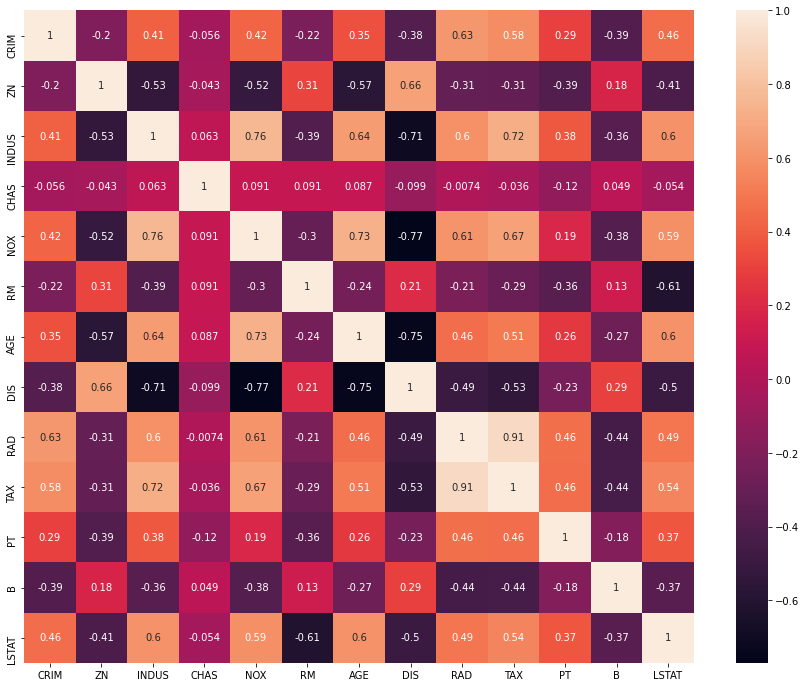

In [249]:
numeric = Boston_Housing_Dataset.drop(['MV'], axis=1)
correlation = numeric.corr()
numeric_columns = numeric.columns
high_corr = []

for c1 in numeric_columns:
    for c2 in numeric_columns:
        if c1 != c2 and c2 not in high_corr and correlation[c1][c2] > 0.5:
            high_corr.append(c1)
print(high_corr)

plt.figure(figsize=(15,12))
sn.heatmap(correlation, annot=True)
plt.show()

Minh họa dữ liệu 

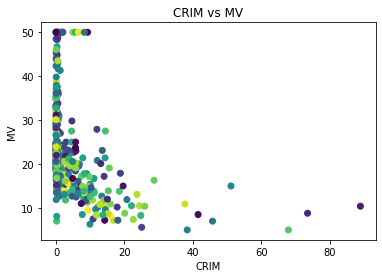

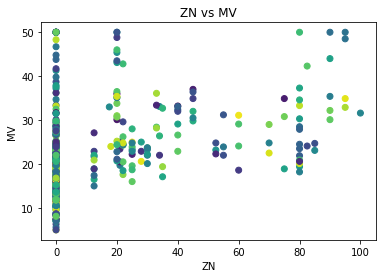

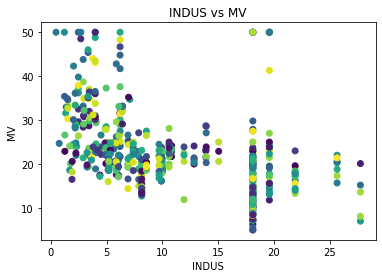

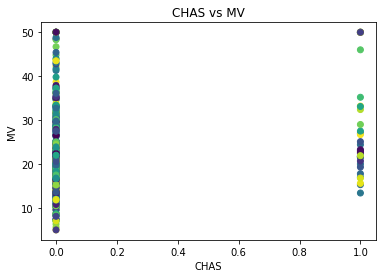

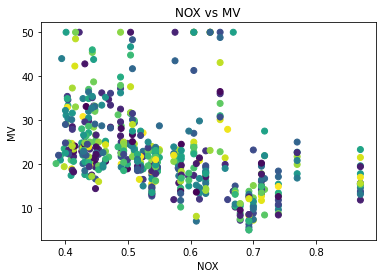

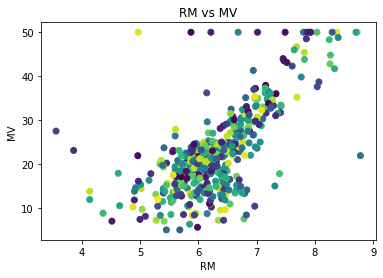

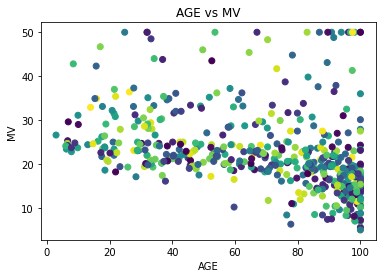

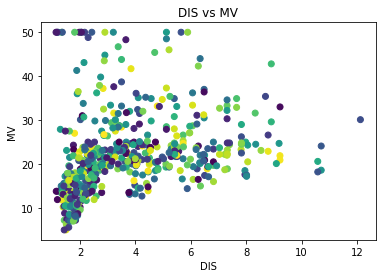

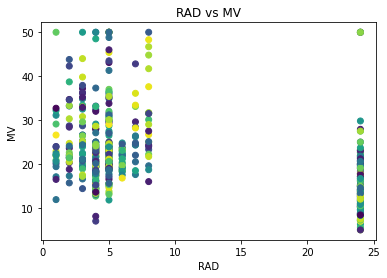

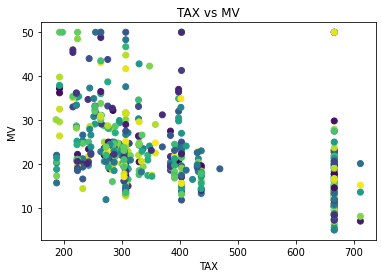

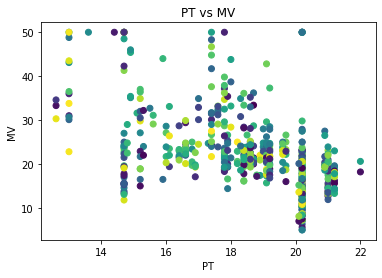

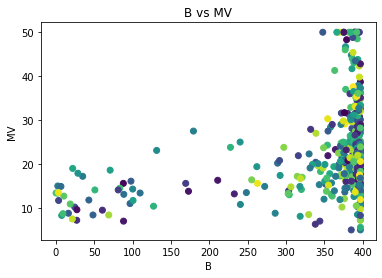

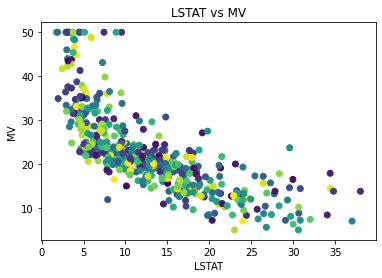

In [250]:
def plot_data(feature1, feature2, title, x_label, y_label):
    fig, ax = plt.subplots()
    colors = np.random.uniform(15, 80, len(feature1))
    ax.scatter(feature1, feature2, c=colors)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
for e in Boston_Housing_Dataset.columns[:-1]:
    plot_data(Boston_Housing_Dataset[e], Boston_Housing_Dataset['MV'], title=e+" vs MV",\
                x_label = e, y_label = "MV")


Trong phần này, ta đi tính ma trận tương quan giữa các đặc trưng, từ đó ta có thể loại bỏ các đặc trưng có tương quan cao với nhau và làm giảm độ phức tạp của bài toán.\
Khi hiển thị dữ liệu lên ta thấy không có nhiều đặc trưng tuyến tính so với MV nên ta sẽ lấy các đặc trưng có xu hướng các điểm dữ liệu nằm trên đường thẳng tuyến tính.
Các đặc trưng được chọn là: RM, AGE, DIS, LSTAT.

In [251]:
dataset = Boston_Housing_Dataset.drop(['CHAS', 'CRIM', 'ZN', 'INDUS', 'NOX', 'RAD', 'PT', 'B', 'TAX'], axis=1)
print(dataset)

        RM        AGE     DIS  LSTAT         MV
0    6.575  65.199997  4.0900   4.98  24.000000
1    6.421  78.900002  4.9671   9.14  21.600000
2    7.185  61.099998  4.9671   4.03  34.700001
3    6.998  45.799999  6.0622   2.94  33.400002
4    7.147  54.200001  6.0622   5.33  36.200001
..     ...        ...     ...    ...        ...
501  6.593  69.099998  2.4786   9.67  22.400000
502  6.120  76.699997  2.2875   9.08  20.600000
503  6.976  91.000000  2.1675   5.64  23.900000
504  6.794  89.300003  2.3889   6.48  22.000000
505  6.030  80.800003  2.5050   7.88  11.900000

[506 rows x 5 columns]


### TÁCH BỘ DỮ LIỆU HUẤN LUYỆN MÔ HÌNH

Trong bài toán này, ta tách bộ dữ liệu train:val:test lần lượt theo tỷ lệ 4:1.
```
Tập training có 405 mẫu.
Tập testing có 101 mẫu.
```

In [252]:
def train_test_split_dataset(dataset, test_size=0.25, feature_ind=[1], random_seed=10):
    listIndex = [i for i in range(len(dataset))]
    random.seed(random_seed)
    random.shuffle(listIndex)
    #print(listIndex)
    dataset = dataset.iloc[listIndex]
    y = dataset.iloc[: , -1]
    dropColumns = np.array(dataset.columns)
    dropColumns = np.delete(dropColumns, feature_ind)
    x = dataset.drop(dropColumns, axis =1 )
    x = preprocessing.normalize(x.to_numpy(), norm='l1')
    y = y.to_numpy()
    
    testSizeNumber = int(test_size * len(y))
    
    return x[testSizeNumber:], x[:testSizeNumber], y[testSizeNumber:], y[:testSizeNumber]

x_train, x_test, y_train, y_test = train_test_split_dataset(dataset, test_size=0.2, feature_ind=[i for i in range(dataset.shape[1]-1)], random_seed=10)
print("Size of data X train matrix %s"  % str(x_train.shape))
print("Size of data Y train array %s"  % str(y_train.shape))
print("Size of data X test matrix %s"  % str(x_test.shape))
print("Size of data Y test array %s"  % str(y_test.shape))

Size of data X train matrix (405, 4)
Size of data Y train array (405,)
Size of data X test matrix (101, 4)
Size of data Y test array (101,)


#### Minh họa dữ liệu

Đầu tiên, ta sử dụng kỹ thuật T-Sne để đưa tập dữ liệu training có 6 chiều về thành 1 chiều. 
Ta nhận thấy dữ liệu có xu hướng nằm gần về 1 đường thẳng khi biến đổi T-Sne từ 6 chiều đặc trưng về 1 chiều đặc trưng.\
Điều này chứng tỏ việc xử dụng thuật toán Linear Regression để dạy máy học là khả thi. 

[Text(0.5, 1.0, 'Boston Prices')]

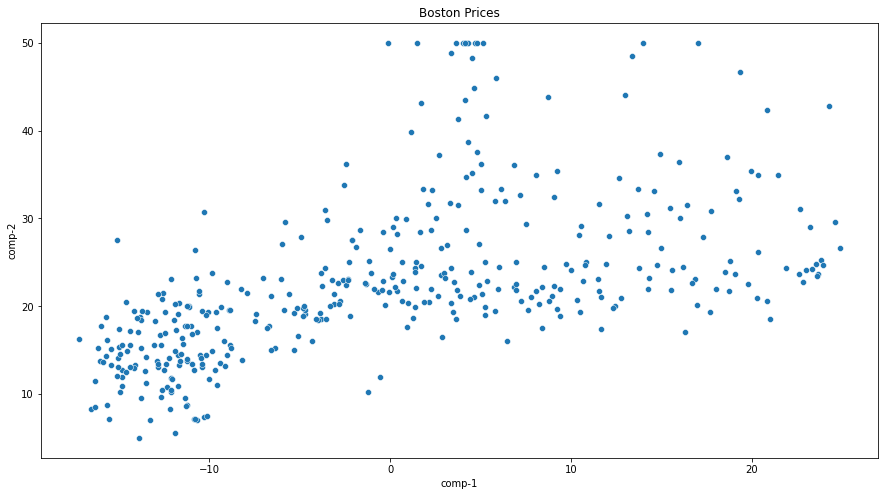

In [253]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
z = tsne.fit_transform(x_train)
dfTSne = pd.DataFrame()
dfTSne['comp-2'] =  y_train
dfTSne["comp-1"] = z[:,0]
plt.figure(figsize=(15,8))
sn.scatterplot(x="comp-1", y='comp-2',
                palette=sn.color_palette("hls", 2),
                data=dfTSne, sizes=(20, 10)).set(title="Boston Prices")

### XÂY DỰNG MODEL

#### 1. Viết hàm cost function
$$J(w) = \frac{1}{m} \sum_{i=1}^m loss(\hat{y}^{(i)}, y^{(i)})= \frac{1}{2m} \sum_{i=1}^m (\hat{y}^{(i)}-y^{(i)})^2 $$
Khai triển, ta có kết quả:
$$J(w) = \frac{1}{2m} \sum_{i=1}^m (w_1 x_1^{(i)} + w_2 x_2^{(i)} + b - y^{(i)})^2 $$

#### 1.1 Viết chương trình

In [254]:
def np_cost(w, b, X, y):
    m, n = X.shape
    cost = 0
    for i in range(m):
        y_hat = b
        for j in range(n):
            y_hat += w[j]*X[i, j] # hypothesis
        cost += (y_hat - y[i])**2 # sum cost of each data point.
    return cost/(2*m)

#### 1.2 Chạy thử chương trình 

In [255]:
w = []
for index in range(x_train.shape[1]):
    w.append(random.uniform(-5, 5))
np_cost(w, 0, x_train, y_train)

340.60750458104974

In [256]:
print(w)
np_cost(w, 20, x_train, y_train)

[-4.4722981227377705, -1.2367308454081938, -0.40895399039454006, -1.6418516497502944]


53.628440131305155

In [257]:
np_cost(w, 0, x_train, y_train)

340.60750458104974

#### 2. Vector hóa hàm cost

Ngoài ra, ta còn có thể viết lại công thức trên như sau:

$$J(w) = \frac{1}{2m} \| X w + b  - y \| ^2$$ 

#### 2.1 Viết chương trình

In [258]:
def np_cost_vectorized(w, b, X, y):
    m = X.shape[0] # number of samples in dataset
    w = np.array(w) # convert to numpy array
    y_hat = np.matmul(X, w) + b
    y_hat = y_hat - y[:]
    cost = np.matmul(y_hat.T, y_hat)/(2*m)
    return cost

#### 2.2 Chạy thử chương trình 

In [259]:
np_cost_vectorized(w, 20, x_train, y_train)

53.628440131305126

In [260]:
np_cost_vectorized(w, 0, x_train, y_train)

340.6075045810496

#### 3.Tính vector gradient của w

Với $i = 1...m $ và $j = 1...n$ xét

$$ \frac{\partial J}{\partial w_j} = \frac{1}{m}\sum_{i=1}^m x_j^{(i)}(\hat{y}^{(i)}-y^{(i)}) $$

#### 3.1 Viết chương trình với vòng `for`

In [261]:
def np_grad_fn(w, X, y):
    m, n = X.shape
    grad_w = np.zeros(np.array(w).shape)
    bias = np.ones((X.shape[0], 1))
    X = np.hstack((bias, X))
    
    y_hat = np.dot(X, w)
    for j in range(grad_w.shape[0]):
        for i in range(m):
            # print("weight:", j)
            # print("x:", X[i, j], " vi tri: ", i, " ", j)
            grad_w[j] += (y_hat[i] - y[i])*X[i, j]/m
    return grad_w


#### 3.2 Kiểm tra chương trình

In [262]:
w = []
for index in range(x_train.shape[1]+1):
    w.append(random.uniform(-5, 5))
print(w)
np_grad_fn(w, x_train, y_train)

[-4.654759138909301, 1.2746852233881807, -0.11173457260396624, 2.09341337628441, -1.3541569064584245]


array([-27.51907864,  -2.54602451, -19.68576608,  -1.79830258,
        -3.48898547])

#### 4.Tính vector gradient của w theo dạng vectorized
$$\nabla J(w) = \frac{1}{m} X^T \left( Xw - y \right)$$ 

#### 4.1 Viết Chương trình

In [263]:
def np_grad_fn_vectorized(w, X, y):
    m, n = X.shape
    bias = np.ones((m, 1))
    X = np.hstack((bias, X))
    y_hat = np.dot(X, w)
    grad_w = np.dot(X.T, y_hat - y)/m
    return grad_w
# w = [0,1,2,3,4]
# x_train = np.array([[1,2,3,4], [5,6,7,8]])
# y_train = np.array([7,8])


#### 4.2 Chạy thử chườn trình

In [264]:
print(w)
np_grad_fn_vectorized(w, x_train, y_train)

[-4.654759138909301, 1.2746852233881807, -0.11173457260396624, 2.09341337628441, -1.3541569064584245]


array([-27.51907864,  -2.54602451, -19.68576608,  -1.79830258,
        -3.48898547])

#### 5. Tính dựa trên Gradient Descent

Xấp xỉ giá trị $w$ như sau

$$ w_j = w_j - \alpha * \frac{\partial J}{\partial w_j}$$

#### 5.1 Viết chương trình

In [265]:
def np_solve_via_gradient_descent(X_train, y_train, check_every=10,
                                    niter=100000, alpha=0.000001):
    m, n = X_train.shape
    training_history = []
    valid_history = []
    # initialize all the weights to zeros
    w = np.zeros((n+1,))
    for k in range(niter):
        dw = np_grad_fn_vectorized(w, X_train, y_train) 
        w = w - alpha*dw
        training_cost = np_cost_vectorized(w[1:], w[0], X_train, y_train)
        training_history.append(training_cost)
        if k % check_every == 0:
            print("Training cost after %d iteration: %s" % (k, str(training_cost)))
            print('Weight after %d iteration: %s' % (k, str(w)))
    return w, training_history, valid_history

#### 5.2 Chạy thử chương trình

In [266]:
opt_w, opt_trainingHist, opt_valHist = np_solve_via_gradient_descent(x_train, y_train, check_every=1000, niter=100000, alpha=0.00005)
print("Trong so cuoi cung: ", opt_w)

Training cost after 0 iteration: 304.3101080877091
Weight after 0 iteration: [1.14154321e-03 1.07831016e-04 8.15121999e-04 7.65139601e-05
 1.42076236e-04]
Training cost after 1000 iteration: 267.16150019567704
Weight after 1000 iteration: [1.09975333 0.10438098 0.78484788 0.07414937 0.1363751 ]
Training cost after 2000 iteration: 235.34282840504125
Weight after 2000 iteration: [2.11687997 0.20190093 1.50987286 0.14358864 0.26151754]
Training cost after 3000 iteration: 208.08913828832533
Weight after 3000 iteration: [3.05859487 0.29317066 2.18028896 0.20873921 0.37639604]
Training cost after 4000 iteration: 184.74526215411063
Weight after 4000 iteration: [3.93051876 0.37865562 2.80016721 0.26992028 0.48177565]
Training cost after 5000 iteration: 164.75006238602322
Weight after 5000 iteration: [4.73785339 0.4587866  3.37327517 0.32742725 0.57836437]
Training cost after 6000 iteration: 147.6229361875637
Weight after 6000 iteration: [5.48541279 0.53396228 3.90309958 0.38153351 0.66681743]


VẼ BIỂU ĐỒ CÁC THÔNG SỐ KHI HUẤN LUYỆN MÔ HÌNH

Text(0, 0.5, 'Training cost Function')

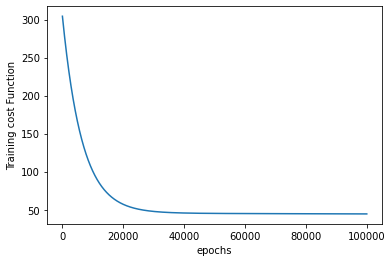

In [267]:
plt.plot([i for i in range(len(opt_trainingHist))], opt_trainingHist, label='linear')
plt.xlabel('epochs')
plt.ylabel('Training cost Function')


TÍNH Jtrain

In [268]:
print("Training cost:", np_cost_vectorized(opt_w[1:], opt_w[0], x_train, y_train))

Training cost: 44.437505016092224


TÍNH Jtest

In [269]:
print("Test cost:", np_cost_vectorized(opt_w[1:], opt_w[0], x_test, y_test))

Test cost: 36.07404215701357
